In [1]:
import os,codecs
import pandas as pd
import nltk
from nltk import*
import matplotlib.pyplot as plt
import string
import numpy as np
import seaborn as sns

# XED Data Cleaning and Preprocessing

- reading the data
- split the labels into three columns:label_1, label_2, label_3
- fill the missing values in label_2 with the corresponding values in label_1
- data cleaning: removing the punctuations and the stopwords
- tokenization

In [2]:
df = pd.read_csv("XED.txt",  error_bad_lines=False, sep= '\t', header= None, names = ["sent", "label_1"])

In [3]:
df.shape

(17528, 2)

In [4]:
df[["label_1", "label_2"]] = df['label_1'].str.split(",", 1, expand=True)
df[["label_2", "label_3"]] = df['label_2'].str.split(",", 1, expand=True)

In [6]:
df.head(10)

,sent,label_1,label_2,label_3
0,", ...",1,None,None
1,!,1,4,7
2,... And I don't think we need to discuss the T...,8,1,None
3,* So get up out of your bed,1,None,None
4,A confession that you hired [PERSON] ... and a...,1,6,None
5,A dead man has one half - hour to raise his ro...,1,None,None
6,A guy that's talking about he's gonna solve al...,1,None,None
7,A guy who was a pain in the neck even before I...,1,None,None
8,A hundred of these are produced every day and ...,1,3,None
9,A lady wouldn't work for this outfit .,1,None,None


In [431]:
df["label_1"] = pd.to_numeric(df["label_1"])
df["label_2_fill"] = np.where(df.label_2.isnull(), df.label_1, df.label_2)
df["label_2_fill"] = pd.to_numeric(df["label_2_fill"])

In [432]:
lst_stopwords = nltk.corpus.stopwords.words("english")

In [433]:
def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    
               
    ## Tokenize (convert from string to list)
    lst_text = text.split()
    table = str.maketrans('', '', string.punctuation)
    lst_text = [w.translate(table) for w in lst_text]
                   
    ## back to string from list
    text = " ".join(lst_text)
    return text

In [434]:
df["text_clean"] = df["sent"].apply(lambda x: 
          utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, 
          lst_stopwords= lst_stopwords))

In [435]:
df['tokenized_sents'] = df.apply(lambda row: nltk.word_tokenize(row["text_clean"]), axis=1)
df.head()

,sent,label_1,label_2,label_3,label_2_fill,text_clean,tokenized_sents
0,", ...",1,None,None,1,,[]
1,!,1,4,7,4,,[]
2,... And I don't think we need to discuss the T...,8,1,None,1,and i dont think we need to discuss the trinit...,"[and, i, dont, think, we, need, to, discuss, t..."
3,* So get up out of your bed,1,None,None,1,so get up out of your bed,"[so, get, up, out, of, your, bed]"
4,A confession that you hired [PERSON] ... and a...,1,6,None,6,a confession that you hired person and are res...,"[a, confession, that, you, hired, person, and,..."


# SentiArt Calculations

In [436]:
TC = '250kSentiArt_EN.xlsx' 

In [437]:
sa = pd.read_excel(TC)

In [438]:
fn = 'XED.txt'

In [439]:
sent_mean_ang_z = []
sent_mean_fear_z = []
sent_mean_disg_z = []
sent_mean_hap_z = []
sent_mean_sad_z = []
sent_mean_surp_z = []


In [440]:
my_list = []
for sent in df.tokenized_sents:
    my_list.append(sent)

In [441]:
len(my_list)

17528

In [442]:
for t in my_list:
    dt = sa.query('word in @t')
    sent_mean_ang_z.append(dt.ang_z.mean())
    sent_mean_fear_z.append(dt.fear_z.mean())
    sent_mean_disg_z.append(dt.disg_z.mean())
    sent_mean_hap_z.append(dt.hap_z.mean())
    sent_mean_sad_z.append(dt.sad_z.mean())
    sent_mean_surp_z.append(dt.surp_z.mean())


In [443]:
df['ang'] = sent_mean_ang_z
df['fear'] = sent_mean_fear_z
df['disg'] = sent_mean_disg_z
df['hap'] = sent_mean_hap_z
df['sad'] = sent_mean_sad_z
df['surp'] = sent_mean_surp_z
df = round(df,3)

In [444]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17528 entries, 0 to 17527
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sent             17528 non-null  object 
 1   label_1          17528 non-null  int64  
 2   label_2          3873 non-null   object 
 3   label_3          849 non-null    object 
 4   label_2_fill     17528 non-null  int64  
 5   text_clean       17528 non-null  object 
 6   tokenized_sents  17528 non-null  object 
 7   ang              17490 non-null  float64
 8   fear             17490 non-null  float64
 9   disg             17490 non-null  float64
 10  hap              17490 non-null  float64
 11  sad              17490 non-null  float64
 12  surp             17490 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 1.7+ MB


In [445]:
print(df.ang.isna().sum())      
print(df.fear.isna().sum())   
print(df.disg.isna().sum()) 
print(df.hap.isna().sum())
print(df.sad.isnull().sum())
print(df.surp.isnull().sum())

38
38
38
38
38
38


In [446]:
df_38 = df.loc[pd.isna(df["disg"]), :]
df_38.head()

,sent,label_1,label_2,label_3,label_2_fill,text_clean,tokenized_sents,ang,fear,disg,hap,sad,surp
0,", ...",1,None,None,1,,[],NaN,NaN,NaN,NaN,NaN,NaN
1,!,1,4,7,4,,[],NaN,NaN,NaN,NaN,NaN,NaN
202,Argh ! Kaili !,1,None,None,1,argh kaili,"[argh, kaili]",NaN,NaN,NaN,NaN,NaN,NaN
287,Bullshit !,1,3,None,3,bullshit,[bullshit],NaN,NaN,NaN,NaN,NaN,NaN
289,Bullshit .,1,7,None,7,bullshit,[bullshit],NaN,NaN,NaN,NaN,NaN,NaN


In [447]:
df.describe()

,label_1,label_2_fill,ang,fear,disg,hap,sad,surp
count,17528.000000,17528.000000,17490.000000,17490.000000,17490.000000,17490.000000,17490.000000,17490.000000
mean,4.118040,4.252624,0.378848,0.844913,0.076678,0.832702,0.617236,0.261800
std,2.507554,2.261142,0.467159,0.502993,0.412391,0.439062,0.473600,0.504366
min,1.000000,1.000000,-1.586000,-2.265000,-2.345000,-1.560000,-1.950000,-1.516000
25%,2.000000,2.000000,0.099000,0.546000,-0.165000,0.574000,0.338000,-0.015000
50%,4.000000,4.000000,0.369000,0.823000,0.055000,0.813000,0.609000,0.211000
75%,6.000000,6.000000,0.643000,1.118000,0.286000,1.068750,0.887000,0.480000
max,8.000000,8.000000,6.098000,9.478000,10.010000,5.384000,5.343000,19.531000


Mapping the target column based on the mapping of XED.

Removing the missing values.

Exploring the distribution of the classes in label_1 and label_2 from XED and the target of SentiArt 


In [448]:
df.head()

,sent,label_1,label_2,label_3,label_2_fill,text_clean,tokenized_sents,ang,fear,disg,hap,sad,surp
0,", ...",1,None,None,1,,[],NaN,NaN,NaN,NaN,NaN,NaN
1,!,1,4,7,4,,[],NaN,NaN,NaN,NaN,NaN,NaN
2,... And I don't think we need to discuss the T...,8,1,None,1,and i dont think we need to discuss the trinit...,"[and, i, dont, think, we, need, to, discuss, t...",0.240,1.354,-0.002,0.818,0.657,-0.216
3,* So get up out of your bed,1,None,None,1,so get up out of your bed,"[so, get, up, out, of, your, bed]",0.524,0.638,0.129,0.776,0.422,-0.158
4,A confession that you hired [PERSON] ... and a...,1,6,None,6,a confession that you hired person and are res...,"[a, confession, that, you, hired, person, and,...",0.893,0.984,0.449,1.317,0.941,0.052


In [449]:
df = df[["text_clean", "label_1", "label_2_fill", "ang", "fear", "disg", "hap", "sad", "surp"]]

In [450]:
df = df.dropna().reset_index(drop=True)
df.shape

(17490, 9)

In [451]:
df.head()

,text_clean,label_1,label_2_fill,ang,fear,disg,hap,sad,surp
0,and i dont think we need to discuss the trinit...,8,1,0.240,1.354,-0.002,0.818,0.657,-0.216
1,so get up out of your bed,1,1,0.524,0.638,0.129,0.776,0.422,-0.158
2,a confession that you hired person and are res...,1,6,0.893,0.984,0.449,1.317,0.941,0.052
3,a dead man has one half hour to raise his roll...,1,1,0.531,0.532,0.192,0.705,0.810,-0.044
4,a guy thats talking about hes gonna solve all ...,1,1,-0.040,0.501,-0.145,0.766,0.492,0.010


In [452]:
df_1 = df[["ang", "fear", "disg", "hap", "sad", "surp"]].apply(lambda row: row.replace(max(row), -3 ), axis=1)

In [453]:
df_1.head()

,ang,fear,disg,hap,sad,surp
0,0.240,-3.000,-0.002,0.818,0.657,-0.216
1,0.524,0.638,0.129,-3.000,0.422,-0.158
2,0.893,0.984,0.449,-3.000,0.941,0.052
3,0.531,0.532,0.192,0.705,-3.000,-0.044
4,-0.040,0.501,-0.145,-3.000,0.492,0.010


In [454]:
df_1.shape

(17490, 6)

In [455]:
df_1["target"] = df_1[["ang", "fear", "disg", "hap", "sad", "surp"]].idxmax(axis=1)
df_1["target_name"] = df_1[["ang", "fear", "disg", "hap", "sad", "surp"]].idxmax(axis=1)

In [456]:
emo_map = {"ang": int(1), "fear": int(4), "disg": int(3), "hap": int(5), "sad" : int(6), "surp": int(7)}
df_1 = df_1.replace({"target": emo_map})
df_1.head()

,ang,fear,disg,hap,sad,surp,target,target_name
0,0.240,-3.000,-0.002,0.818,0.657,-0.216,5,hap
1,0.524,0.638,0.129,-3.000,0.422,-0.158,4,fear
2,0.893,0.984,0.449,-3.000,0.941,0.052,4,fear
3,0.531,0.532,0.192,0.705,-3.000,-0.044,5,hap
4,-0.040,0.501,-0.145,-3.000,0.492,0.010,4,fear


In [457]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17490 entries, 0 to 17489
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ang          17490 non-null  float64
 1   fear         17490 non-null  float64
 2   disg         17490 non-null  float64
 3   hap          17490 non-null  float64
 4   sad          17490 non-null  float64
 5   surp         17490 non-null  float64
 6   target       17490 non-null  int64  
 7   target_name  17490 non-null  object 
dtypes: float64(6), int64(1), object(1)
memory usage: 1.1+ MB


In [458]:
df = pd.concat([df[["text_clean", "label_1", "label_2_fill"]], df_1], axis=1)

In [459]:
df.head()

,text_clean,label_1,label_2_fill,ang,fear,disg,hap,sad,surp,target,target_name
0,and i dont think we need to discuss the trinit...,8,1,0.240,-3.000,-0.002,0.818,0.657,-0.216,5,hap
1,so get up out of your bed,1,1,0.524,0.638,0.129,-3.000,0.422,-0.158,4,fear
2,a confession that you hired person and are res...,1,6,0.893,0.984,0.449,-3.000,0.941,0.052,4,fear
3,a dead man has one half hour to raise his roll...,1,1,0.531,0.532,0.192,0.705,-3.000,-0.044,5,hap
4,a guy thats talking about hes gonna solve all ...,1,1,-0.040,0.501,-0.145,-3.000,0.492,0.010,4,fear


In [460]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17490 entries, 0 to 17489
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   text_clean    17490 non-null  object 
 1   label_1       17490 non-null  int64  
 2   label_2_fill  17490 non-null  int64  
 3   ang           17490 non-null  float64
 4   fear          17490 non-null  float64
 5   disg          17490 non-null  float64
 6   hap           17490 non-null  float64
 7   sad           17490 non-null  float64
 8   surp          17490 non-null  float64
 9   target        17490 non-null  int64  
 10  target_name   17490 non-null  object 
dtypes: float64(6), int64(3), object(2)
memory usage: 1.5+ MB


In [461]:
df.target.value_counts()

5    6372
4    4254
6    4072
1    1338
7    1199
3     255
Name: target, dtype: int64

In [462]:
df.label_1.value_counts()

1    3703
2    2706
8    2684
5    1843
4    1791
6    1702
3    1639
7    1422
Name: label_1, dtype: int64

In [463]:
df.label_2_fill.value_counts()

2    2701
5    2516
1    2486
7    2080
6    2048
3    2028
4    2016
8    1615
Name: label_2_fill, dtype: int64

In [464]:
df_anger = df.loc[df["label_1"] == 1]
df_anger["target_name"].value_counts()

hap     1364
fear     877
sad      790
ang      391
surp     221
disg      60
Name: target_name, dtype: int64

In [465]:
df_anticipation = df.loc[df["label_1"] == 2]
df_anticipation["target_name"].value_counts()

hap     1001
fear     724
sad      608
surp     222
ang      119
disg      32
Name: target_name, dtype: int64

In [466]:
df_disgust = df.loc[df["label_1"] == 3]
df_disgust["target_name"].value_counts()

hap     537
fear    416
sad     403
ang     173
surp     64
disg     46
Name: target_name, dtype: int64

In [467]:
df_fear = df.loc[df["label_1"] == 4]
df_fear["target_name"].value_counts()

hap     696
fear    421
sad     344
ang     166
surp    139
disg     25
Name: target_name, dtype: int64

In [468]:
df_joy = df.loc[df["label_1"] == 5]
df_joy.target_name.value_counts()

sad     575
hap     567
fear    419
surp    152
ang     103
disg     27
Name: target_name, dtype: int64

In [469]:
df_sad = df.loc[df["label_1"] == 6]
df_sad.target_name.value_counts()

hap     670
fear    379
sad     369
ang     144
surp    114
disg     26
Name: target_name, dtype: int64

In [470]:
df_surp = df.loc[df["label_1"] == 7]
df_surp.target_name.value_counts()

hap     522
sad     377
fear    300
ang     107
surp     96
disg     20
Name: target_name, dtype: int64

In [471]:
df_trust = df[df["label_1"] == 8]
df_trust.target_name.value_counts()

hap     1015
fear     718
sad      606
surp     191
ang      135
disg      19
Name: target_name, dtype: int64

In [472]:
df_anger_2 = df[df["label_2_fill"] == 1]
df_anger_2.target_name.value_counts()                 

hap     956
fear    574
sad     512
ang     256
surp    152
disg     36
Name: target_name, dtype: int64

In [473]:
df_antic_2 = df[df["label_2_fill"] == 2]
df_antic_2.target_name.value_counts()

hap     1010
fear     732
sad      592
surp     212
ang      119
disg      36
Name: target_name, dtype: int64

In [474]:
df_disg_2 = df[df["label_2_fill"] == 3]
df_disg_2.target_name.value_counts()

hap     651
fear    512
sad     502
ang     229
surp     85
disg     49
Name: target_name, dtype: int64

In [475]:
df_fear_2 = df[df["label_2_fill"] == 4]
df_fear_2.target_name.value_counts()

hap     770
fear    477
sad     402
ang     189
surp    148
disg     30
Name: target_name, dtype: int64

In [476]:
df_hap_2 = df[df["label_2_fill"] == 5]
df_hap_2.target_name.value_counts()

hap     788
sad     739
fear    600
surp    221
ang     133
disg     35
Name: target_name, dtype: int64

In [477]:
df_sad_2 = df[df["label_2_fill"] == 6]
df_sad_2.target_name.value_counts()

hap     811
fear    471
sad     421
ang     174
surp    137
disg     34
Name: target_name, dtype: int64

In [478]:
df_surp_2 = df[df["label_2_fill"] == 7]
df_surp_2.target_name.value_counts()

hap     761
sad     554
fear    437
ang     158
surp    143
disg     27
Name: target_name, dtype: int64

In [479]:
df_trust_2 = df[df["label_2_fill"] == 8]
df_trust_2.target_name.value_counts()

hap     625
fear    451
sad     350
surp    101
ang      80
disg      8
Name: target_name, dtype: int64

# Classification

In [480]:
df["label_fear"] = df["label_1"].map({1:0, 2:0, 3:0, 4:1, 5:0, 6:0, 7:0, 8:0})

In [481]:
df["target_fear"] = df["target"].map({1:0, 3:0, 4:1, 5:0, 6:0, 7:0})

In [482]:
df.target_fear.value_counts()

0    13236
1     4254
Name: target_fear, dtype: int64

In [483]:
df.label_fear.value_counts()

0    15699
1     1791
Name: label_fear, dtype: int64

In [484]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.linear_model import LogisticRegression


In [485]:
X = df["text_clean"]
y_target = df["target_fear"]
y_label = df["label_fear"]

X_train, X_test, y_train_t, y_test_t, y_train_l, y_test_l = train_test_split(X, y_target, y_label, test_size=0.30, random_state=42)

In [486]:
# Naïve Bayes:
text_clf_nb = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', MultinomialNB()),
])

# Linear SVC:
text_clf_lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

# LogisticRegression 
text_clf_lr = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LogisticRegression()),
])

In [487]:
print("Report of MultinomialNB_fear")
text_clf_nb.fit(X_train, y_train_t)
predictions = text_clf_nb.predict(X_test)
print("Confusion Matrix \n",metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score: ", metrics.accuracy_score(y_test_l,predictions))

Report of MultinomialNB_fear
Confusion Matrix 
 [[4708   13]
 [ 523    3]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      4721
           1       0.19      0.01      0.01       526

    accuracy                           0.90      5247
   macro avg       0.54      0.50      0.48      5247
weighted avg       0.83      0.90      0.85      5247

Accuracy Score:  0.8978463884124261


In [488]:
print("Report of LinearSVC_fear")
text_clf_lsvc.fit(X_train, y_train_t)
predictions = text_clf_lsvc.predict(X_test)
print("Confusion Matrix \n", metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score: ", metrics.accuracy_score(y_test_l,predictions))

Report of LinearSVC_fear
Confusion Matrix 
 [[4136  585]
 [ 464   62]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4721
           1       0.10      0.12      0.11       526

    accuracy                           0.80      5247
   macro avg       0.50      0.50      0.50      5247
weighted avg       0.82      0.80      0.81      5247

Accuracy Score:  0.8000762340384981


In [489]:
print("Report of LogisticRegression_fear")
text_clf_lr.fit(X_train, y_train_t)
predictions = text_clf_lr.predict(X_test)
print("Confusion Matrix \n", metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score: ", metrics.accuracy_score(y_test_l,predictions))

Report of LogisticRegression_fear
Confusion Matrix 
 [[4499  222]
 [ 510   16]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      4721
           1       0.07      0.03      0.04       526

    accuracy                           0.86      5247
   macro avg       0.48      0.49      0.48      5247
weighted avg       0.81      0.86      0.84      5247

Accuracy Score:  0.8604917095483133


In [490]:
df["label_hap"] = df["label_1"].map({1:0, 2:0, 3:0, 4:0, 5:1, 6:0, 7:0, 8:0})
df["target_hap"] = df["target"].map({1:0, 3:0, 4:0, 5:1, 6:0, 7:0})

In [491]:
df.target_hap.value_counts()

0    11118
1     6372
Name: target_hap, dtype: int64

In [492]:
df.label_hap.value_counts()

0    15647
1     1843
Name: label_hap, dtype: int64

In [493]:
X = df["text_clean"]
y_target = df["target_hap"]
y_label = df["label_hap"]

X_train, X_test, y_train_t, y_test_t, y_train_l, y_test_l = train_test_split(X, y_target, y_label, test_size=0.30, random_state=42)

In [494]:
print("Report of MultinomialNB_hap")
text_clf_nb.fit(X_train, y_train_t)
predictions = text_clf_nb.predict(X_test)
print("Confusion Matrix \n",metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score:", metrics.accuracy_score(y_test_l,predictions))

Report of MultinomialNB_hap
Confusion Matrix 
 [[4076  608]
 [ 515   48]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4684
           1       0.07      0.09      0.08       563

    accuracy                           0.79      5247
   macro avg       0.48      0.48      0.48      5247
weighted avg       0.80      0.79      0.79      5247

Accuracy Score: 0.7859729369163332


In [495]:
print("Report of LinearSVC_hap")
text_clf_lsvc.fit(X_train, y_train_t)
predictions = text_clf_lsvc.predict(X_test)
print("Confusion Matrix \n",metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score", metrics.accuracy_score(y_test_l,predictions))

Report of LinearSVC_hap
Confusion Matrix 
 [[3162 1522]
 [ 424  139]]
              precision    recall  f1-score   support

           0       0.88      0.68      0.76      4684
           1       0.08      0.25      0.13       563

    accuracy                           0.63      5247
   macro avg       0.48      0.46      0.44      5247
weighted avg       0.80      0.63      0.70      5247

Accuracy Score 0.6291214027063083


In [496]:
print("Report of LogisticRegression_hap")
text_clf_lr.fit(X_train, y_train_t)
predictions = text_clf_lr.predict(X_test)
print("Confusion Matrix \n",metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score", metrics.accuracy_score(y_test_l,predictions))

Report of LogisticRegression_hap
Confusion Matrix 
 [[3514 1170]
 [ 478   85]]
              precision    recall  f1-score   support

           0       0.88      0.75      0.81      4684
           1       0.07      0.15      0.09       563

    accuracy                           0.69      5247
   macro avg       0.47      0.45      0.45      5247
weighted avg       0.79      0.69      0.73      5247

Accuracy Score 0.6859157613874595


In [497]:
df["label_sad"] = df["label_1"].map({1:0, 2: 0, 3:0, 4:0, 5:0, 6:1, 7:0, 8:0})
df["target_sad"] = df["target"].map({1:0, 3:0, 4:0, 5:0, 6:1, 7:0})

In [498]:
df.target_sad.value_counts()

0    13418
1     4072
Name: target_sad, dtype: int64

In [499]:
df.label_sad.value_counts()

0    15788
1     1702
Name: label_sad, dtype: int64

In [500]:
X = df["text_clean"]
y_target = df["target_sad"]
y_label = df["label_sad"]

X_train, X_test, y_train_t, y_test_t, y_train_l, y_test_l = train_test_split(X, y_target, y_label, test_size=0.30, random_state=42)

In [501]:
print("Report of MultinomialNB_sad")
text_clf_nb.fit(X_train, y_train_t)
predictions = text_clf_nb.predict(X_test)
print("Confusion Matrix \n",metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score:", metrics.accuracy_score(y_test_l,predictions))

Report of MultinomialNB_sad
Confusion Matrix 
 [[4708   30]
 [ 507    2]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.95      4738
           1       0.06      0.00      0.01       509

    accuracy                           0.90      5247
   macro avg       0.48      0.50      0.48      5247
weighted avg       0.82      0.90      0.85      5247

Accuracy Score: 0.8976558033161807


In [502]:
print("Report of LinearSVC_sad")
text_clf_lsvc.fit(X_train, y_train_t)
predictions = text_clf_lsvc.predict(X_test)
print("Confusion Matrix \n",metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score", metrics.accuracy_score(y_test_l,predictions))

Report of LinearSVC_sad
Confusion Matrix 
 [[4071  667]
 [ 444   65]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      4738
           1       0.09      0.13      0.10       509

    accuracy                           0.79      5247
   macro avg       0.50      0.49      0.49      5247
weighted avg       0.82      0.79      0.80      5247

Accuracy Score 0.7882599580712788


In [503]:
print("Report of LogisticRegression_sad")
text_clf_lr.fit(X_train, y_train_t)
predictions = text_clf_lr.predict(X_test)
print("Confusion Matrix \n",metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score", metrics.accuracy_score(y_test_l,predictions))

Report of LogisticRegression_sad
Confusion Matrix 
 [[4394  344]
 [ 479   30]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      4738
           1       0.08      0.06      0.07       509

    accuracy                           0.84      5247
   macro avg       0.49      0.49      0.49      5247
weighted avg       0.82      0.84      0.83      5247

Accuracy Score 0.8431484657899753


# SentArt vs label_2

In [504]:
df["label_fear_2"] = df["label_2_fill"].map({1: 0, 2: 0, 3:0, 4:1, 5:0, 6:0, 7:0, 8:0})
X = df["text_clean"]
y_target = df["target_fear"]
y_label = df["label_fear_2"]

X_train, X_test, y_train_t, y_test_t, y_train_l, y_test_l = train_test_split(X, y_target, y_label, test_size=0.30, random_state=42)

In [505]:
print(df.label_fear_2.value_counts())
print(df.target_fear.value_counts())


0    15474
1     2016
Name: label_fear_2, dtype: int64
0    13236
1     4254
Name: target_fear, dtype: int64


In [506]:
print("Report of MultinomialNB_fear_2")
text_clf_nb.fit(X_train, y_train_t)
predictions = text_clf_nb.predict(X_test)
print("Confusion Matrix \n",metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score: ", metrics.accuracy_score(y_test_l,predictions))

Report of MultinomialNB_fear_2
Confusion Matrix 
 [[4642   12]
 [ 589    4]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      4654
           1       0.25      0.01      0.01       593

    accuracy                           0.89      5247
   macro avg       0.57      0.50      0.48      5247
weighted avg       0.82      0.89      0.83      5247

Accuracy Score:  0.8854583571564704


In [507]:
print("Report of LinearSVC_fear_2")
text_clf_lsvc.fit(X_train, y_train_t)
predictions = text_clf_lsvc.predict(X_test)
print("Confusion Matrix \n", metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score: ", metrics.accuracy_score(y_test_l,predictions))

Report of LinearSVC_fear_2
Confusion Matrix 
 [[4070  584]
 [ 530   63]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      4654
           1       0.10      0.11      0.10       593

    accuracy                           0.79      5247
   macro avg       0.49      0.49      0.49      5247
weighted avg       0.80      0.79      0.79      5247

Accuracy Score:  0.7876882027825424


In [508]:
print("Report of LogisticRegression_fear_2")
text_clf_lr.fit(X_train, y_train_t)
predictions = text_clf_lr.predict(X_test)
print("Confusion Matrix \n",metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score", metrics.accuracy_score(y_test_l,predictions))

Report of LogisticRegression_fear_2
Confusion Matrix 
 [[4435  219]
 [ 574   19]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4654
           1       0.08      0.03      0.05       593

    accuracy                           0.85      5247
   macro avg       0.48      0.49      0.48      5247
weighted avg       0.79      0.85      0.82      5247

Accuracy Score 0.8488660186773395


In [509]:
df["label_hap_2"] = df["label_2_fill"].map({1: 0, 2: 0, 3:0, 4:0, 5:1, 6:0, 7:0, 8:0})
X = df["text_clean"]
y_target = df["target_hap"]
y_label = df["label_hap_2"]

X_train, X_test, y_train_t, y_test_t, y_train_l, y_test_l = train_test_split(X, y_target, y_label, test_size=0.30, random_state=42)

In [510]:
print(df.label_hap_2.value_counts())
print(df.target_hap.value_counts())

0    14974
1     2516
Name: label_hap_2, dtype: int64
0    11118
1     6372
Name: target_hap, dtype: int64


In [511]:
print("Report of MultinomialNB_hap_2")
text_clf_nb.fit(X_train, y_train_t)
predictions = text_clf_nb.predict(X_test)
print("Confusion Matrix \n",metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score: ", metrics.accuracy_score(y_test_l,predictions))

Report of MultinomialNB_hap_2
Confusion Matrix 
 [[3868  578]
 [ 723   78]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      4446
           1       0.12      0.10      0.11       801

    accuracy                           0.75      5247
   macro avg       0.48      0.48      0.48      5247
weighted avg       0.73      0.75      0.74      5247

Accuracy Score:  0.7520487897846388


In [512]:
print("Report of LinearSVC_hap_2")
text_clf_lsvc.fit(X_train, y_train_t)
predictions = text_clf_lsvc.predict(X_test)
print("Confusion Matrix \n", metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score: ", metrics.accuracy_score(y_test_l,predictions))

Report of LinearSVC_hap_2
Confusion Matrix 
 [[3000 1446]
 [ 585  216]]
              precision    recall  f1-score   support

           0       0.84      0.67      0.75      4446
           1       0.13      0.27      0.18       801

    accuracy                           0.61      5247
   macro avg       0.48      0.47      0.46      5247
weighted avg       0.73      0.61      0.66      5247

Accuracy Score:  0.6129216695254431


In [513]:
print("Report of LogisticRegression_hap_2")
text_clf_lr.fit(X_train, y_train_t)
predictions = text_clf_lr.predict(X_test)
print("Confusion Matrix \n",metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score", metrics.accuracy_score(y_test_l,predictions))

Report of LogisticRegression_hap_2
Confusion Matrix 
 [[3334 1112]
 [ 658  143]]
              precision    recall  f1-score   support

           0       0.84      0.75      0.79      4446
           1       0.11      0.18      0.14       801

    accuracy                           0.66      5247
   macro avg       0.47      0.46      0.46      5247
weighted avg       0.73      0.66      0.69      5247

Accuracy Score 0.6626643796455117


In [514]:
df["label_sad_2"] = df["label_2_fill"].map({1: 0, 2: 0, 3:0, 4:0, 5:0, 6:1, 7:0, 8:0})
X = df["text_clean"]
y_target = df["target_sad"]
y_label = df["label_sad_2"]

X_train, X_test, y_train_t, y_test_t, y_train_l, y_test_l = train_test_split(X, y_target, y_label, test_size=0.30, random_state=42)

In [515]:
print(df.label_sad_2.value_counts())
print(df.target_sad.value_counts())


0    15442
1     2048
Name: label_sad_2, dtype: int64
0    13418
1     4072
Name: target_sad, dtype: int64


In [516]:
print("Report of MultinomialNB_sad_2")
text_clf_nb.fit(X_train, y_train_t)
predictions = text_clf_nb.predict(X_test)
print("Confusion Matrix \n",metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score: ", metrics.accuracy_score(y_test_l,predictions))

Report of MultinomialNB_sad_2
Confusion Matrix 
 [[4600   30]
 [ 615    2]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      4630
           1       0.06      0.00      0.01       617

    accuracy                           0.88      5247
   macro avg       0.47      0.50      0.47      5247
weighted avg       0.79      0.88      0.83      5247

Accuracy Score:  0.8770726129216695


In [517]:
print("Report of LinearSVC_sad_2")
text_clf_lsvc.fit(X_train, y_train_t)
predictions = text_clf_lsvc.predict(X_test)
print("Confusion Matrix \n", metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score: ", metrics.accuracy_score(y_test_l,predictions))

Report of LinearSVC_sad_2
Confusion Matrix 
 [[3977  653]
 [ 538   79]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      4630
           1       0.11      0.13      0.12       617

    accuracy                           0.77      5247
   macro avg       0.49      0.49      0.49      5247
weighted avg       0.79      0.77      0.78      5247

Accuracy Score:  0.773013150371641


In [518]:
print("Report of LogisticRegression_sad_2")
text_clf_lr.fit(X_train, y_train_t)
predictions = text_clf_lr.predict(X_test)
print("Confusion Matrix \n",metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score", metrics.accuracy_score(y_test_l,predictions))

Report of LogisticRegression_sad_2
Confusion Matrix 
 [[4294  336]
 [ 579   38]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4630
           1       0.10      0.06      0.08       617

    accuracy                           0.83      5247
   macro avg       0.49      0.49      0.49      5247
weighted avg       0.79      0.83      0.81      5247

Accuracy Score 0.8256146369353916


# POS vs NEG

In [519]:
df.head()

,text_clean,label_1,label_2_fill,ang,fear,disg,hap,sad,surp,target,target_name,label_fear,target_fear,label_hap,target_hap,label_sad,target_sad,label_fear_2,label_hap_2,label_sad_2
0,and i dont think we need to discuss the trinit...,8,1,0.240,-3.000,-0.002,0.818,0.657,-0.216,5,hap,0,0,0,1,0,0,0,0,0
1,so get up out of your bed,1,1,0.524,0.638,0.129,-3.000,0.422,-0.158,4,fear,0,1,0,0,0,0,0,0,0
2,a confession that you hired person and are res...,1,6,0.893,0.984,0.449,-3.000,0.941,0.052,4,fear,0,1,0,0,0,0,0,0,1
3,a dead man has one half hour to raise his roll...,1,1,0.531,0.532,0.192,0.705,-3.000,-0.044,5,hap,0,0,0,1,0,0,0,0,0
4,a guy thats talking about hes gonna solve all ...,1,1,-0.040,0.501,-0.145,-3.000,0.492,0.010,4,fear,0,1,0,0,0,0,0,0,0


In [520]:
df["label_polarity"] = df["label_1"].map({1:0, 2:1, 3:0, 4:0, 5:1, 6:0, 7:0, 8:1})
df["target_polarity"] = df["target"].map({1:0, 3:0, 4:0, 5:1, 6:0, 7:0})
X = df["text_clean"]
y_target = df["target_polarity"]
y_label = df["label_polarity"]

X_train, X_test, y_train_t, y_test_t, y_train_l, y_test_l = train_test_split(X, y_target, y_label, test_size=0.30, random_state=42)

In [521]:
df.label_polarity.value_counts()

0    10257
1     7233
Name: label_polarity, dtype: int64

In [522]:
df.target_polarity.value_counts()

0    11118
1     6372
Name: target_polarity, dtype: int64

In [523]:
print("Report of MultinomialNB Polarity")
text_clf_nb.fit(X_train, y_train_t)
predictions = text_clf_nb.predict(X_test)
print("Confusion Matrix \n",metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score: ", metrics.accuracy_score(y_test_l,predictions))

Report of MultinomialNB Polarity
Confusion Matrix 
 [[2682  378]
 [1909  278]]
              precision    recall  f1-score   support

           0       0.58      0.88      0.70      3060
           1       0.42      0.13      0.20      2187

    accuracy                           0.56      5247
   macro avg       0.50      0.50      0.45      5247
weighted avg       0.52      0.56      0.49      5247

Accuracy Score:  0.5641318848866018


In [524]:
print("Report of LinearSVC Polarity")
text_clf_lsvc.fit(X_train, y_train_t)
predictions = text_clf_lsvc.predict(X_test)
print("Confusion Matrix \n", metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score: ", metrics.accuracy_score(y_test_l,predictions))

Report of LinearSVC Polarity
Confusion Matrix 
 [[2107  953]
 [1479  708]]
              precision    recall  f1-score   support

           0       0.59      0.69      0.63      3060
           1       0.43      0.32      0.37      2187

    accuracy                           0.54      5247
   macro avg       0.51      0.51      0.50      5247
weighted avg       0.52      0.54      0.52      5247

Accuracy Score:  0.5364970459310082


In [525]:
print("Report of LogisticRegression Polarity")
text_clf_lr.fit(X_train, y_train_t)
predictions = text_clf_lr.predict(X_test)
print("Confusion Matrix \n",metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score", metrics.accuracy_score(y_test_l,predictions))

Report of LogisticRegression Polarity
Confusion Matrix 
 [[2353  707]
 [1639  548]]
              precision    recall  f1-score   support

           0       0.59      0.77      0.67      3060
           1       0.44      0.25      0.32      2187

    accuracy                           0.55      5247
   macro avg       0.51      0.51      0.49      5247
weighted avg       0.53      0.55      0.52      5247

Accuracy Score 0.5528873642081189


# Polarity label_2_fill

In [526]:
df["label_polarity_2"] = df["label_2_fill"].map({1:0, 2:1, 3:0, 4:0, 5:1, 6:0, 7:0, 8:1})
df["target_polarity"] = df["target"].map({1:0, 3:0, 4:0, 5:1, 6:0, 7:0})
X = df["text_clean"]
y_target = df["target_polarity"]
y_label = df["label_polarity_2"]

X_train, X_test, y_train_t, y_test_t, y_train_l, y_test_l = train_test_split(X, y_target, y_label, test_size=0.30, random_state=42)

In [527]:
df.label_polarity_2.value_counts()

0    10658
1     6832
Name: label_polarity_2, dtype: int64

In [528]:
print("Report of MultinomialNB Polarity 2")
text_clf_nb.fit(X_train, y_train_t)
predictions = text_clf_nb.predict(X_test)
print("Confusion Matrix \n",metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score: ", metrics.accuracy_score(y_test_l,predictions))

Report of MultinomialNB Polarity 2
Confusion Matrix 
 [[2748  398]
 [1843  258]]
              precision    recall  f1-score   support

           0       0.60      0.87      0.71      3146
           1       0.39      0.12      0.19      2101

    accuracy                           0.57      5247
   macro avg       0.50      0.50      0.45      5247
weighted avg       0.52      0.57      0.50      5247

Accuracy Score:  0.5728987993138936


In [529]:
print("Report of LinearSVC Polarity 2")
text_clf_lsvc.fit(X_train, y_train_t)
predictions = text_clf_lsvc.predict(X_test)
print("Confusion Matrix \n", metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score: ", metrics.accuracy_score(y_test_l,predictions))

Report of LinearSVC Polarity 2
Confusion Matrix 
 [[2154  992]
 [1431  670]]
              precision    recall  f1-score   support

           0       0.60      0.68      0.64      3146
           1       0.40      0.32      0.36      2101

    accuracy                           0.54      5247
   macro avg       0.50      0.50      0.50      5247
weighted avg       0.52      0.54      0.53      5247

Accuracy Score:  0.5382123117972175


In [530]:
print("Report of LogisticRegression Polarity 2")
text_clf_lr.fit(X_train, y_train_t)
predictions = text_clf_lr.predict(X_test)
print("Confusion Matrix \n",metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score", metrics.accuracy_score(y_test_l,predictions))

Report of LogisticRegression Polarity 2
Confusion Matrix 
 [[2402  744]
 [1590  511]]
              precision    recall  f1-score   support

           0       0.60      0.76      0.67      3146
           1       0.41      0.24      0.30      2101

    accuracy                           0.56      5247
   macro avg       0.50      0.50      0.49      5247
weighted avg       0.52      0.56      0.53      5247

Accuracy Score 0.5551743853630646


# Multiclass Classification

In [531]:
data = df[["text_clean", "label_1", "ang", "fear", "disg", "hap", "sad", "surp", "target", "label_2_fill", "target_name", "target_polarity", "label_polarity"]]

In [532]:
anticipation = data[data["label_1"] == 2].index
data = data.drop(anticipation, inplace= False)

In [533]:
trust = data[data["label_1"] == 8].index
data = data.drop(trust, inplace= False)

In [534]:
data = data.reset_index(drop=True)

In [535]:
data.shape

(12100, 13)

In [536]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12100 entries, 0 to 12099
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   text_clean       12100 non-null  object 
 1   label_1          12100 non-null  int64  
 2   ang              12100 non-null  float64
 3   fear             12100 non-null  float64
 4   disg             12100 non-null  float64
 5   hap              12100 non-null  float64
 6   sad              12100 non-null  float64
 7   surp             12100 non-null  float64
 8   target           12100 non-null  int64  
 9   label_2_fill     12100 non-null  int64  
 10  target_name      12100 non-null  object 
 11  target_polarity  12100 non-null  int64  
 12  label_polarity   12100 non-null  int64  
dtypes: float64(6), int64(5), object(2)
memory usage: 1.2+ MB


In [537]:
data.target.value_counts()

5    4356
6    2858
4    2812
1    1084
7     786
3     204
Name: target, dtype: int64

In [538]:
data.label_1.value_counts()

1    3703
5    1843
4    1791
6    1702
3    1639
7    1422
Name: label_1, dtype: int64

In [539]:
X = data["text_clean"]
y_target = data["target"]
y_label = data["label_1"]

X_train, X_test, y_train_t, y_test_t, y_train_l, y_test_l = train_test_split(X, y_target, y_label, test_size=0.30, random_state=42)

In [540]:
print("Report of MultinomialNB")
text_clf_nb.fit(X_train, y_train_t)
predictions = text_clf_nb.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test_l,predictions)
print("Confusion Matrix \n",confusion_matrix)
print(metrics.classification_report(y_test_l,predictions, zero_division = 0))
print("Accuracy Score: ", metrics.accuracy_score(y_test_l,predictions))

Report of MultinomialNB
Confusion Matrix 
 [[   1    0   65 1007   65    0]
 [   0    0   38  400   47    0]
 [   0    0   43  459   44    0]
 [   1    0   28  416   92    0]
 [   0    0   29  445   39    0]
 [   0    0   24  352   35    0]]
              precision    recall  f1-score   support

           1       0.50      0.00      0.00      1138
           3       0.00      0.00      0.00       485
           4       0.19      0.08      0.11       546
           5       0.14      0.77      0.23       537
           6       0.12      0.08      0.09       513
           7       0.00      0.00      0.00       411

    accuracy                           0.14      3630
   macro avg       0.16      0.16      0.07      3630
weighted avg       0.22      0.14      0.06      3630

Accuracy Score:  0.13746556473829202


classes [1 3 4 5 6 7]


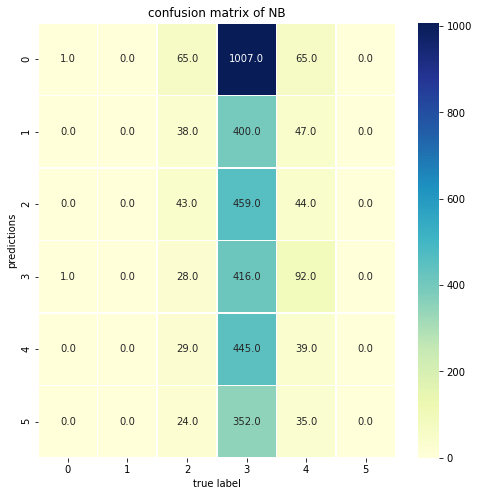

In [541]:
print("classes",text_clf_nb.classes_)
f,ax = plt.subplots(figsize=(8,8))
sns.heatmap(confusion_matrix, annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap="YlGnBu");
plt.title("confusion matrix of NB")
plt.xlabel("true label");
plt.ylabel("predictions");

In [542]:
print("Report of LinearSVC")
text_clf_lsvc.fit(X_train, y_train_t)
predictions = text_clf_lsvc.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test_l,predictions)
print("Confusion Matrix \n", metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score: ", metrics.accuracy_score(y_test_l,predictions))

Report of LinearSVC
Confusion Matrix 
 [[ 91   6 214 540 245  42]
 [ 34   2 116 178 139  16]
 [ 41   2 116 249 117  21]
 [ 22   1 120 194 164  36]
 [ 31   2  99 254 107  20]
 [ 20   3  86 172 109  21]]
              precision    recall  f1-score   support

           1       0.38      0.08      0.13      1138
           3       0.12      0.00      0.01       485
           4       0.15      0.21      0.18       546
           5       0.12      0.36      0.18       537
           6       0.12      0.21      0.15       513
           7       0.13      0.05      0.07       411

    accuracy                           0.15      3630
   macro avg       0.17      0.15      0.12      3630
weighted avg       0.21      0.15      0.13      3630

Accuracy Score:  0.14628099173553719


classes: [1 3 4 5 6 7]


Text(0.5, 1.0, 'confusion matrix of SVC')

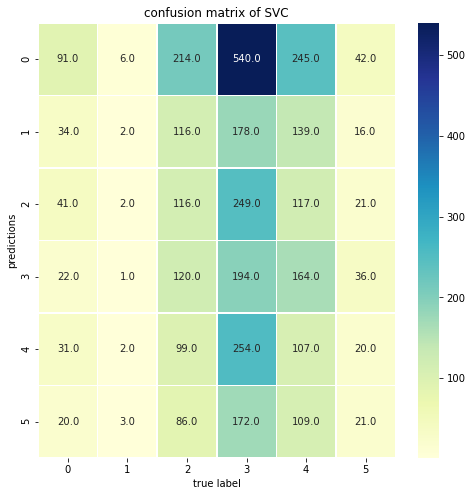

In [543]:
f,ax = plt.subplots(figsize=(8,8))
print("classes:" ,text_clf_lsvc.classes_)   
sns.heatmap(confusion_matrix, annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap="YlGnBu");
plt.xlabel("true label");
plt.ylabel("predictions");
plt.title("confusion matrix of SVC")

# Polarity (after removing 2 and 8)

# label_1

In [544]:
X = data["text_clean"]
y_target = data["target_polarity"]
y_label = data["label_polarity"]

X_train, X_test, y_train_t, y_test_t, y_train_l, y_test_l = train_test_split(X, y_target, y_label, test_size=0.30, random_state=42)

In [545]:
print("Report of MultinomialNB Polarity")
text_clf_nb.fit(X_train, y_train_t)
predictions = text_clf_nb.predict(X_test)
print("Confusion Matrix \n",metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score: ", metrics.accuracy_score(y_test_l,predictions))

Report of MultinomialNB Polarity
Confusion Matrix 
 [[2704  389]
 [ 499   38]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      3093
           1       0.09      0.07      0.08       537

    accuracy                           0.76      3630
   macro avg       0.47      0.47      0.47      3630
weighted avg       0.73      0.76      0.74      3630

Accuracy Score:  0.7553719008264462


In [546]:
print("Report of LinearSVC Polarity")
text_clf_lsvc.fit(X_train, y_train_t)
predictions = text_clf_lsvc.predict(X_test)
print("Confusion Matrix \n", metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score: ", metrics.accuracy_score(y_test_l,predictions))

Report of LinearSVC Polarity
Confusion Matrix 
 [[2111  982]
 [ 411  126]]
              precision    recall  f1-score   support

           0       0.84      0.68      0.75      3093
           1       0.11      0.23      0.15       537

    accuracy                           0.62      3630
   macro avg       0.48      0.46      0.45      3630
weighted avg       0.73      0.62      0.66      3630

Accuracy Score:  0.6162534435261708


In [547]:
print("Report of LogisticRegression Polarity")
text_clf_lr.fit(X_train, y_train_t)
predictions = text_clf_lr.predict(X_test)
print("Confusion Matrix \n",metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score", metrics.accuracy_score(y_test_l,predictions))

Report of LogisticRegression Polarity
Confusion Matrix 
 [[2375  718]
 [ 472   65]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      3093
           1       0.08      0.12      0.10       537

    accuracy                           0.67      3630
   macro avg       0.46      0.44      0.45      3630
weighted avg       0.72      0.67      0.70      3630

Accuracy Score 0.6721763085399449
